## Importar los datos 

In [1]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df=pd.read_csv(url,header=None,sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendimiento de los datos 

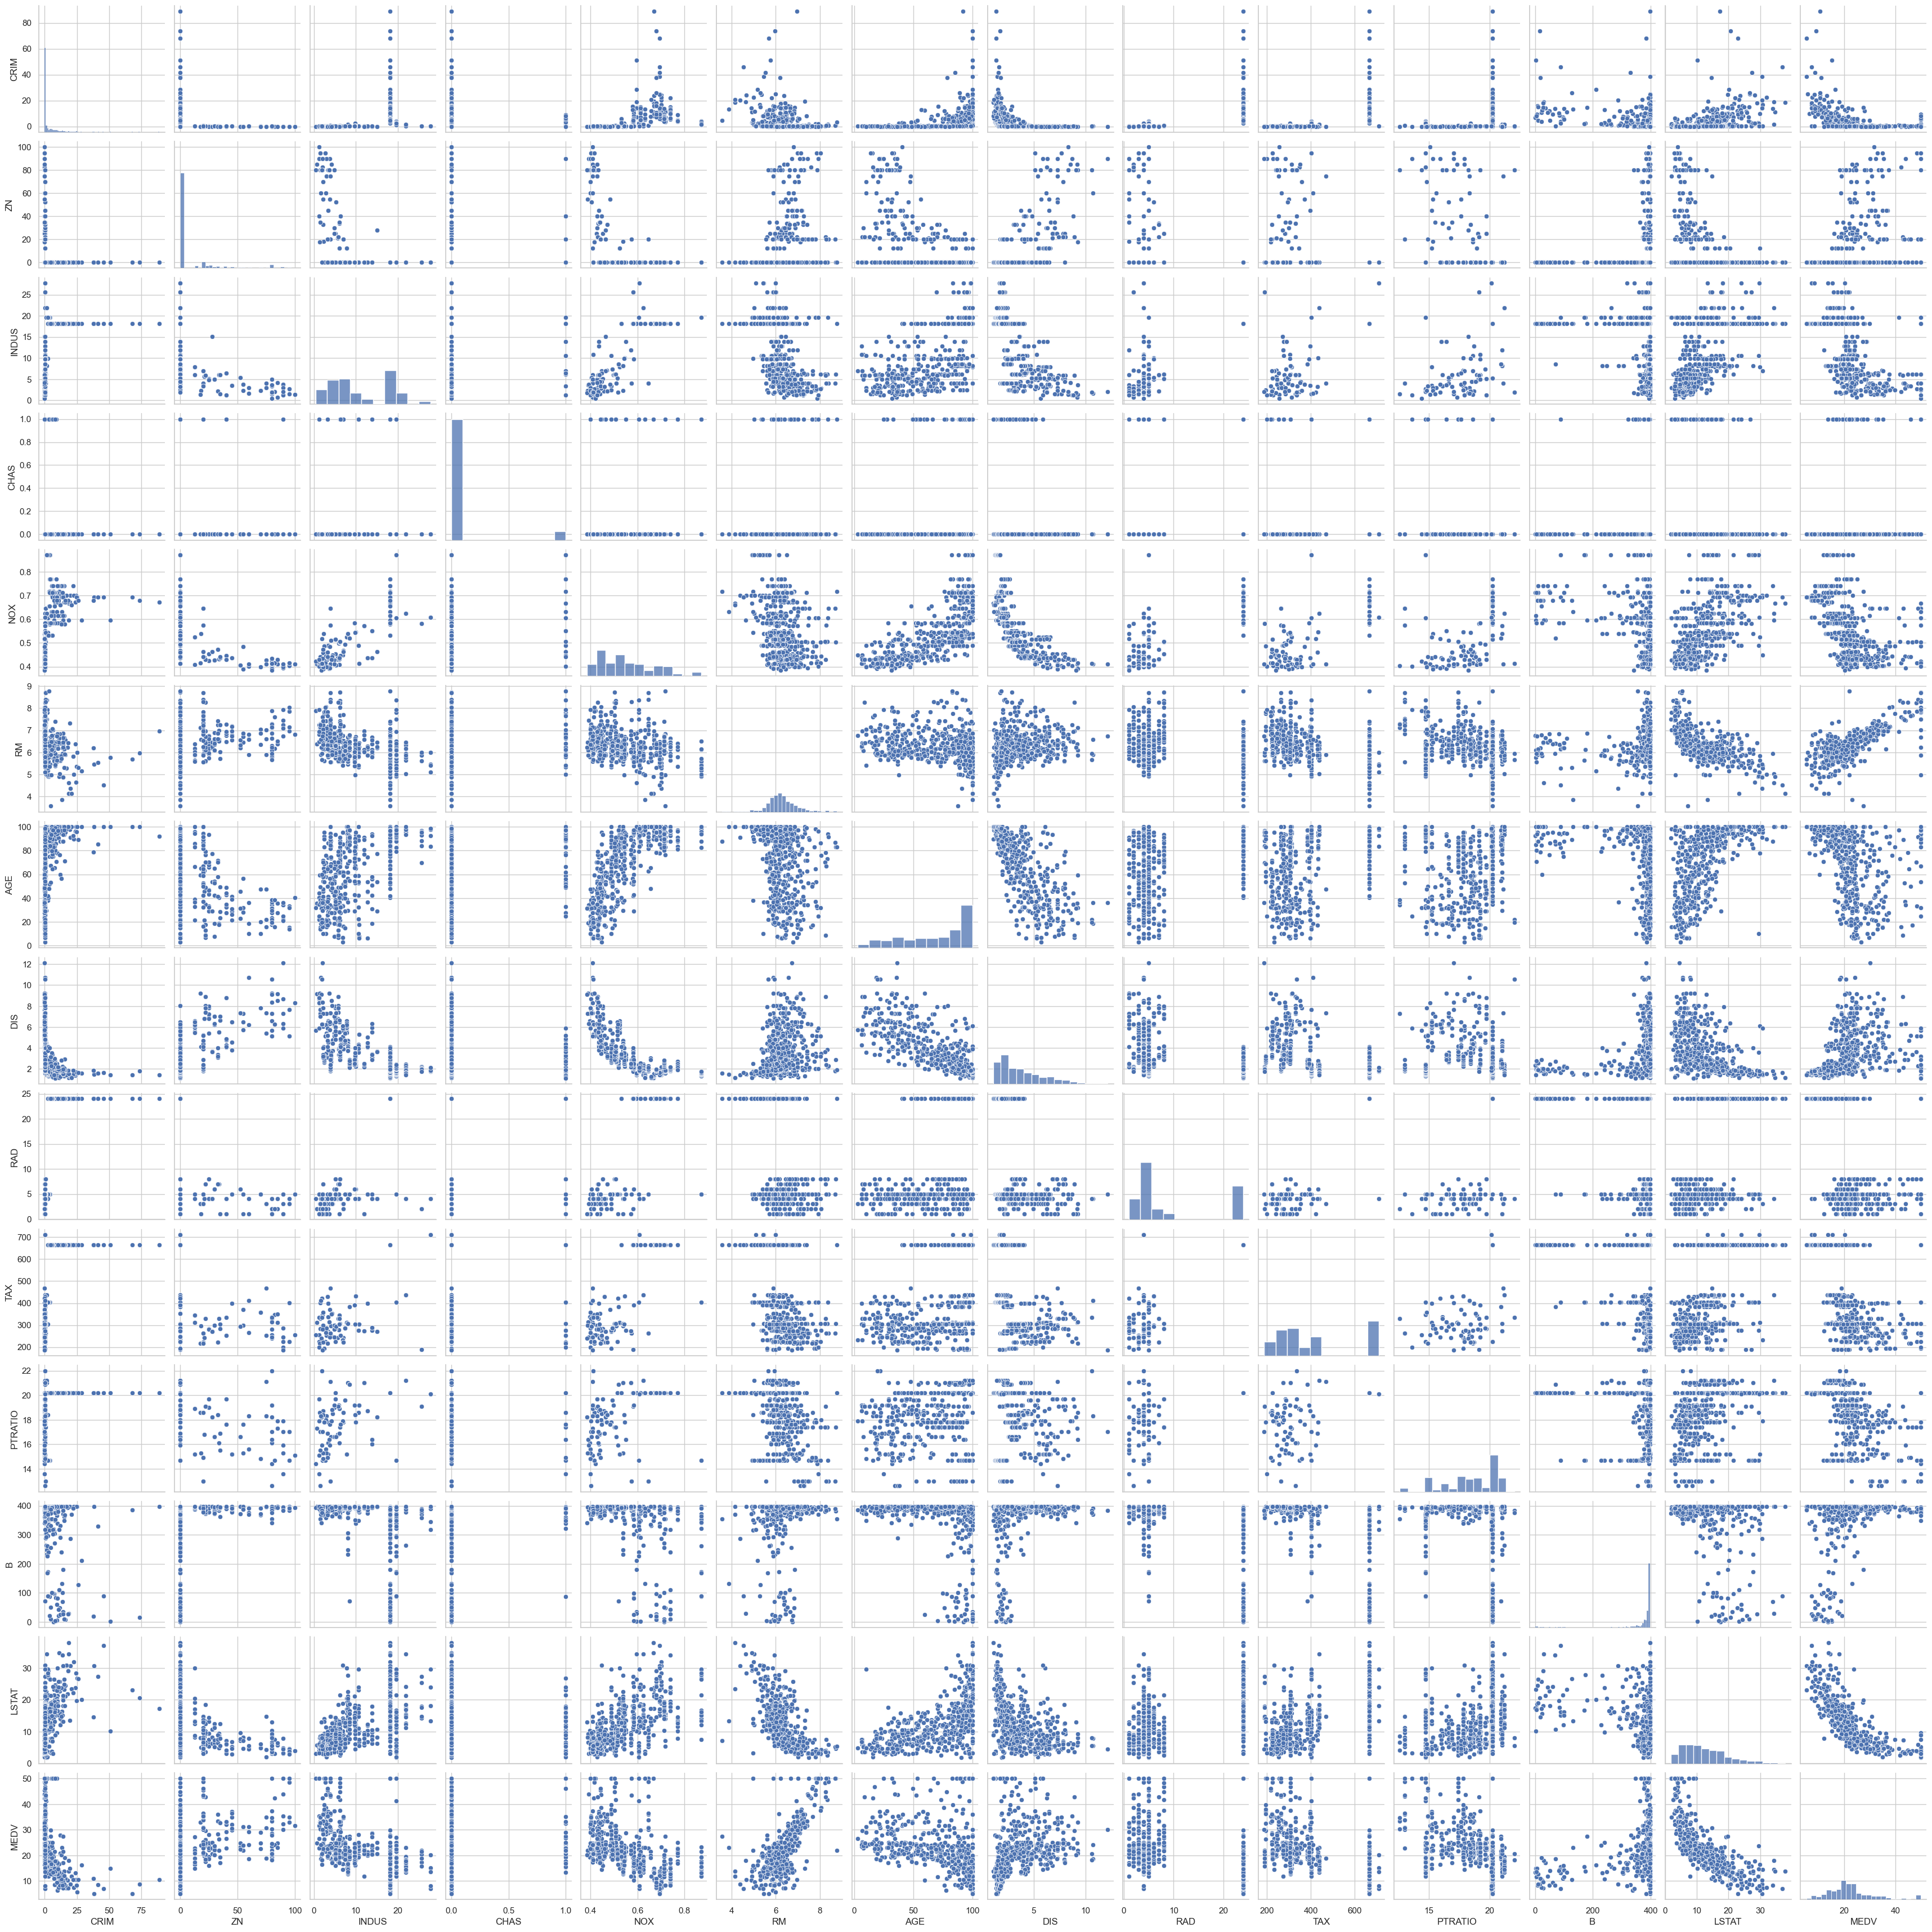

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',context='notebook')
sns.pairplot(df)


In [4]:
plt.show()

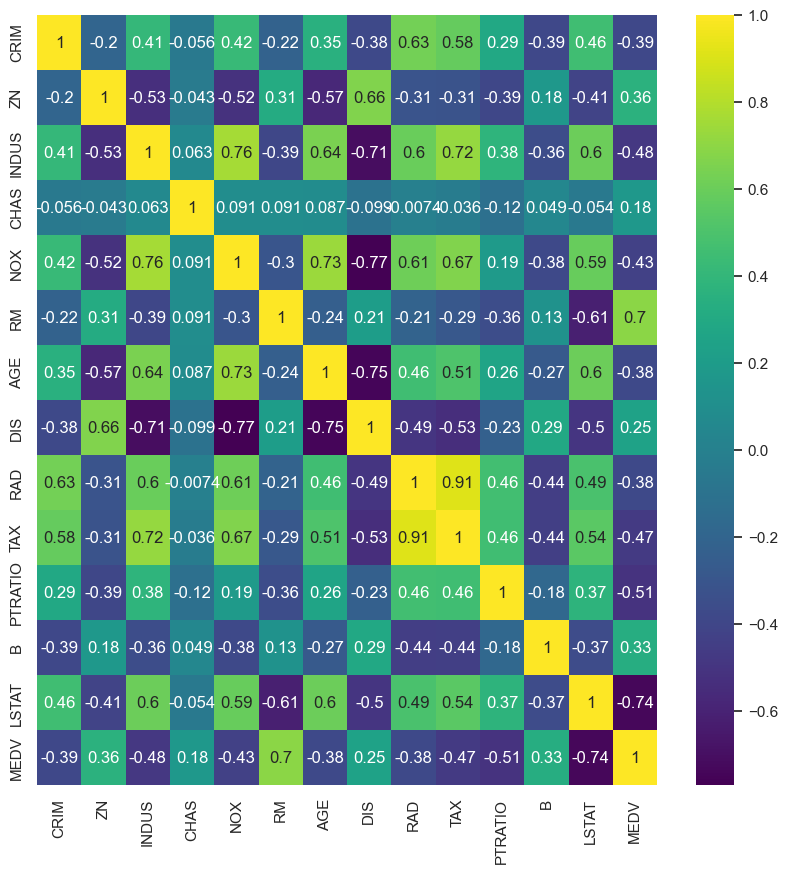

In [5]:
corr=df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,annot=True,cmap='viridis')
plt.show()

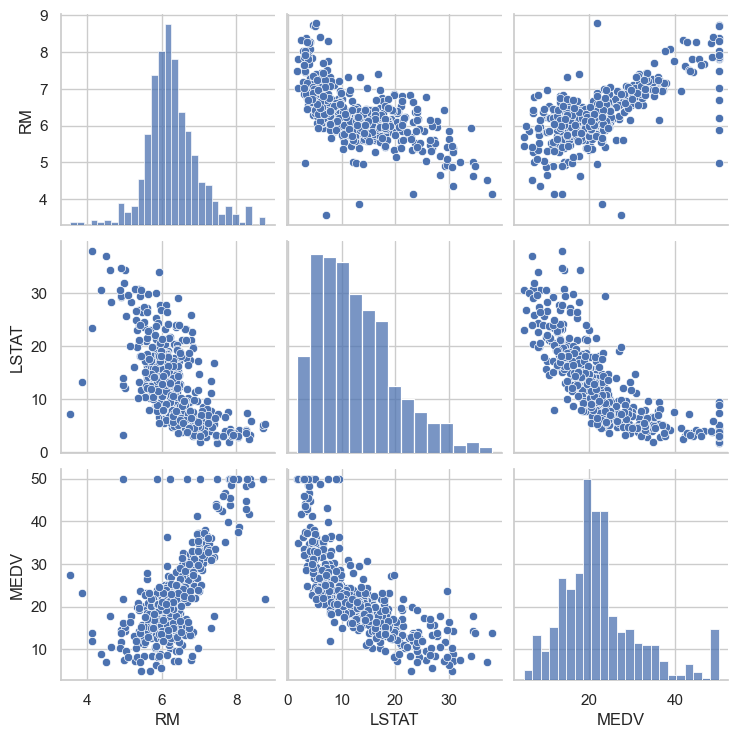

In [6]:
cols=['RM','LSTAT','MEDV']
sns.pairplot(df[cols])
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X=df[cols].drop('MEDV',axis=1)
Y=df['MEDV'].values.reshape(-1,1)


In [8]:
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [9]:
## Escalamiento
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_x.fit_transform(X)
y_std = scaler_y.fit_transform(Y)

## Entrenamiento del Modelo 

model=LinearRegression()
model.fit(X_std,y_std)



LinearRegression()

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Kfold=KFold(n_splits=10, random_state=88, shuffle=True)
result=cross_val_score(model,X_std,y_std,cv=Kfold,scoring='neg_mean_squared_error')

print(f'El MSE de la regresión es {result.mean():,.2f}, ({result.std():,.2f})')

El MSE de la regresión es -0.37, (0.11)


## Anlisis de los Resultados 

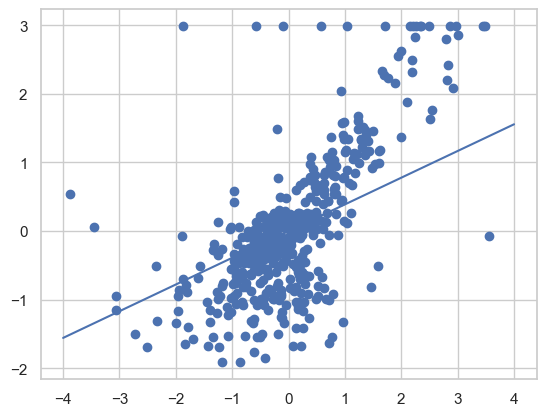

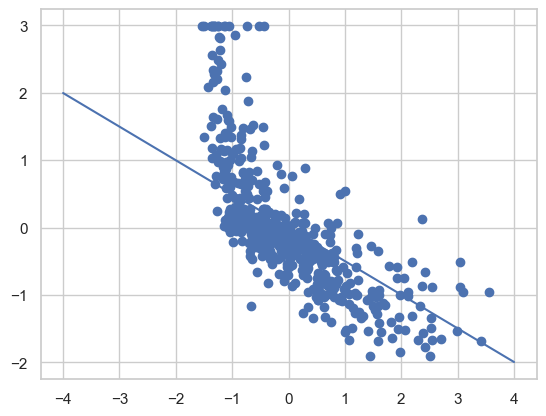

In [11]:
import numpy as np

coef=model.coef_
inter=model.intercept_
rm=np.linspace(-4,4,100)
lstat=np.linspace(-4,4,100)

y= coef[0][0]*rm+inter

plt.scatter(X_std[:,0],y_std)
plt.plot(rm,y)
plt.show()

y= coef[0][1]*lstat+inter

plt.scatter(X_std[:,1],y_std)
plt.plot(rm,y)
plt.show()




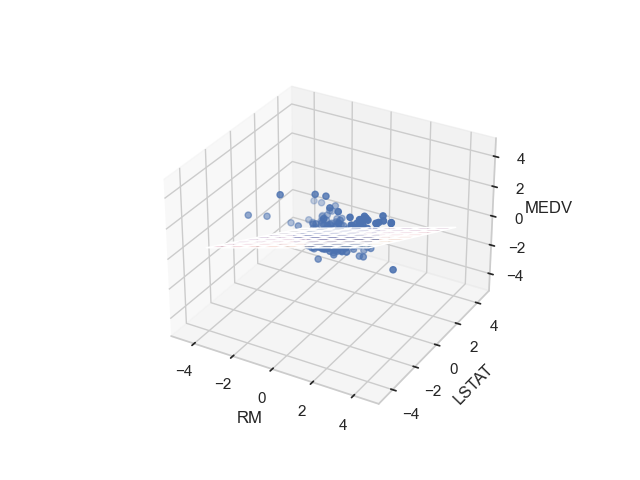

In [48]:
%matplotlib widget
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_std[:,0],X_std[:,1],y_std)
xx,yy=np.meshgrid(np.linspace(-4,4,10),np.linspace(-4,4,10))
z=coef[0][0]*xx+coef[0][1]*yy+inter
ax.plot_surface(xx, yy, z, alpha=0.2,cmap='magma')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.xlim(-5,5)
plt.ylim(-5,5)
ax.set_zlim3d(-5,5)
plt.show()

In [121]:
rmp=8
lstatp=5
Xp=pd.DataFrame(np.arra.y([rmp,lstatp]).reshape(1,-1),columns=['RM','LSTAT'])
Xp_std=scaler_x.transform(Xp)
yp=scaler_y.inverse_transform(model.predict(Xp_std))
print(f'El precio de una casa con {rmp} habitaciones es ${yp[0][0]*1000:,.2f}')

El precio de una casa con 8 habitaciones es $36,188.24


In [118]:
Xp_std

    
    

array([[-1.83016553, -0.37188991]])